***importing basic libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

***adding the data set***

In [2]:
import kagglehub
import os
data = kagglehub.dataset_download("abdelrahman16/obesity-dataset")
file_data = os.path.join(data, 'ObesityDataSet_raw_and_data_sinthetic.csv')

100%|██████████| 57.6k/57.6k [00:00<00:00, 24.3MB/s]

Extracting files...


# ***First we need to read the csv file and get some information about current file***

In [3]:
file = pd.read_csv(file_data)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [4]:
file.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


***check out the distribution of obesity level***

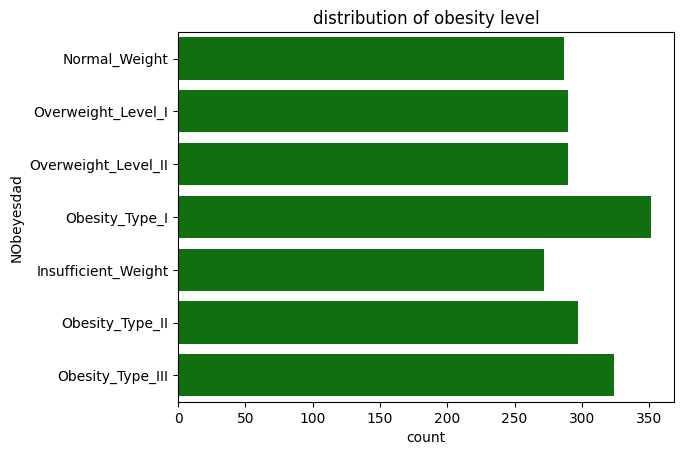

In [16]:
sns.countplot(y = 'NObeyesdad' , data = file , color ='green')
plt.title('distribution of obesity level')
plt.show()

***if there are null indexes, delete them (not recommended , just for this project)bold text***

In [6]:
print(f' before: \n {file.isnull().sum()}')
file.dropna(inplace = False )
print(f' after : \n {file.isnull().sum()} ')

 before: 
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
 after : 
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                        

***we need to know the mean, standard deviation, and... to understand more our data set***

In [7]:
file.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# ***standardize and one hot encoding the data sets ***

In [8]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [9]:
continuous_columns = file.select_dtypes( include = ['float' , ]).columns.tolist()

std= StandardScaler()
std_features = std.fit_transform(file[continuous_columns])
std_df = pd.DataFrame(std_features , columns = std.get_feature_names_out(continuous_columns))
#std_df.head()
std_data = pd.concat([file.drop(columns = continuous_columns) , std_df] , axis =1)
std_data.head()

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [10]:
categorical_columns = std_data.select_dtypes(include = ['object']).columns.tolist()
#print(catagorical_columns)
categorical_columns.remove('NObeyesdad')


ohe = OneHotEncoder(sparse_output = False , drop = 'first')
ohe_features = ohe.fit_transform(std_data[categorical_columns])
ohe_df = pd.DataFrame(ohe_features , columns = ohe.get_feature_names_out(categorical_columns))
#ohe_df.head()
ohe_data = pd.concat([std_data.drop( columns =categorical_columns) , ohe_df] , axis =1)
ohe_data.head()


,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
ohe_data['NObeyesdad'] = ohe_data['NObeyesdad'].astype('category').cat.codes
ohe_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# ***after preprocessing we need to split the data and train the model with ova and ovo***

***splitting into different training and tests***

In [12]:
x = ohe_data.drop(['NObeyesdad'] , axis =1)
y = ohe_data['NObeyesdad']
ova_model = OneVsRestClassifier(LogisticRegression(max_iter = 1000))
for test_size in [.1 , .2  , .3] :
    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = test_size , random_state = 42 ,stratify = y)

    ova_model.fit(x_train , y_train)
    y_pred = ova_model.predict(x_test)
    accuracy_model = np.round(100 * accuracy_score(y_test , y_pred) , 2)
    print(f' test size : {test_size} \n accuracy score : {accuracy_model}%  ')

 test size : 0.1 
 accuracy score : 75.94%  
 test size : 0.2 
 accuracy score : 76.12%  
 test size : 0.3 
 accuracy score : 74.92%  


In [13]:
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter = 1000))
for test_size in [.1 , .2 , .3] :
    x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x , y , test_size = test_size , random_state = 42 , stratify = y)
    ovo_model.fit(x_train2 , y_train2)
    ovo_pred = ovo_model.predict(x_test2)
    accuracy_ovo = np.round(100 * accuracy_score(y_test2 , ovo_pred) ,2)
    print(f' test size :{test_size} \n accuracy score{accuracy_ovo}% ')

 test size :0.1 
 accuracy score90.57% 
 test size :0.2 
 accuracy score92.2% 
 test size :0.3 
 accuracy score90.85% 


***we compared One-versus-all and One-versus-One classifiers ***

# ***let's see what feature is more important here***

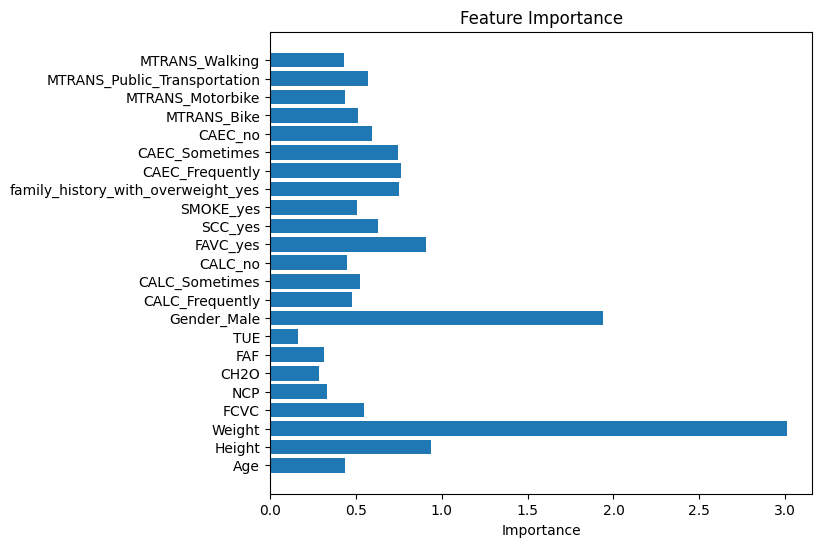

In [14]:
coeficients = np.array([est.coef_[0] for est in ova_model.estimators_ ])
#print(coeficients)
feature_imp = np.mean(np.abs(coeficients) , axis = 0)
plt.figure(figsize=(7, 6))
plt.barh(x.columns , feature_imp)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# ***now let's implantation a pipeline that automates this bunch of code***

In [15]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.preprocessing import StandardScaler , OneHotEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
#from sklearn.metrics import accuracy_score
#import kagglehub
#import os
#import warnings
#warnings.filterwarnings('ignore')
#%matplotlib inline
def obesity_pipeline(data_path , test_size):
    data = pd.read_csv(data_path)
    continuous_columns = data.select_dtypes(include=['float']).columns.tolist()
    std = StandardScaler()
    std_features = std.fit_transform(data[continuous_columns])
    std_df = pd.DataFrame(std_features , columns = std.get_feature_names_out(continuous_columns))
    std_data = pd.concat([data.drop(columns = continuous_columns) ,std_df ] , axis =1)

    categorical_columns = std_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')
    ohe = OneHotEncoder(sparse_output = False , drop = 'first')
    ohe_features = ohe.fit_transform(std_data[categorical_columns])
    ohe_df = pd.DataFrame(ohe_features , columns = ohe.get_feature_names_out(categorical_columns))
    ohe_data = pd.concat([std_data.drop(columns=categorical_columns) , ohe_df] , axis = 1)

    ohe_data['NObeyesdad'] = ohe_data['NObeyesdad'].astype('category').cat.codes

    x = ohe_data.drop(['NObeyesdad'] , axis =1)
    y = ohe_data['NObeyesdad']

    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = test_size , random_state = 42 , stratify = y)

    ova_model = OneVsRestClassifier(LogisticRegression(max_iter = 1000))
    ova_model.fit(x_train , y_train)
    y_pred = ova_model.predict(x_test)
    accuracy_model = np.round(100 * accuracy_score(y_test , y_pred) , 2)
    print(f' model OneVsRest : \n test size : {test_size} \n accuracy score : {accuracy_model}%')
    ovo_model = OneVsOneClassifier(LogisticRegression(max_iter = 1000))
    ovo_model.fit(x_train , y_train)
    ovo_pred = ovo_model.predict(x_test)
    accuracy_ovo = np.round(100 *accuracy_score(y_test , ovo_pred) ,2)
    print(f'model OneVsOne : \n test size :{test_size} \n accuracy score : {accuracy_ovo}%')

    return ova_model, ovo_model, accuracy_model, accuracy_ovo

for test_size in [.1 , .2 , .3] :
    obesity_pipeline(file_data , test_size)

 model OneVsRest : 
 test size : 0.1 
 accuracy score : 75.94%
model OneVsOne : 
 test size :0.1 
 accuracy score : 90.57%
 model OneVsRest : 
 test size : 0.2 
 accuracy score : 76.12%
model OneVsOne : 
 test size :0.2 
 accuracy score : 92.2%
 model OneVsRest : 
 test size : 0.3 
 accuracy score : 74.92%
model OneVsOne : 
 test size :0.3 
 accuracy score : 90.85%
